In [1]:
#!/usr/bin/env python
# coding: utf-8

# # Make a [tonic](https://tonic.readthedocs.io/en/latest/) dataset - see [documentation](https://tonic.readthedocs.io/en/latest/tutorials/wrapping_own_data.html)
# ## Example with the RGB frames dataset provided by NTUA, translated by UCA into events using vid2e

from dataset_creation_aprovis3d import aprovis3dDataset
from hots.utils import get_dataset_info
from os import walk, path
import numpy as np
import matplotlib.pyplot as plt

# path where you'll go to find your .npy files to make the dataset with
### TO BE MODIFIED
# path = '../../Data/DVS128_ZED_NUC_jAER/'
data_path = '/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/'

/home/amelie/VirtualEnvironments/HOTS/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
event_files = []
for (rep_path, _, files) in walk(data_path):
    for f in files: 
        if f.endswith('npy'):
            event_files.append(path.join(rep_path, f))
print(event_files)

['/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/session_5_only_ground/DVS128_06_06_2022_session_5.npy', '/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/session_4_only_sea/DVS128_06_06_2022_session_4.npy', '/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/session_3_only_ground/DVS128_06_06_2022_session_3.npy', '/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/session_6_only_sea/DVS128_06_06_2022_session_6.npy', '/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/session_2_only_sea/DVS128_06_06_2022_session_2.npy', '/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/session_1_only_ground/DVS128_06_06_2022_session_1.npy']


In [3]:
# load data
# file_ev = event_files[0]
file_ev = '/home/amelie/Scripts/Data/coastline_events/DVS128_ZED_NUC_jAER/session_6_only_sea/DVS128_06_06_2022_session_6.npy'
ev = np.load(file_ev)
label = 'sea' if 'sea' in file_ev else 'ground'
print(label)

dtype = np.dtype([("x", int), ("y", int), ("t", int), ("p", int)])
ordering = dtype.names

sea


# Display event repartition

In [4]:
min_ts = np.min(ev[:,ordering.index('t')])
max_ts = np.max(ev[:,ordering.index('t')])
print('Min timestamps:', min_ts)
print('Max timestamps:', max_ts)

Min timestamps: 0.0
Max timestamps: 106.8


## Patch duration = $1s$

(array([31379., 22470., 26115., 23528., 27289., 30049., 20320., 21185.,
        17921., 13720., 24629., 21693., 15459., 23441., 18999., 21313.,
        15751., 13958.,  6985.,  6322., 10419.,  9638.,  8528., 14911.,
         7963.,  5680., 14044.,  5441., 10868., 21882.,  6063.,  5002.,
        13114., 17902., 16925.,  4606.,   147., 18842., 13001., 14668.,
        17849., 19023., 14084., 11804., 15618., 22557.,  3407.,     0.,
            0.,     0.,     0.,     0., 10048., 89952.,     0.,     0.,
            0.,     0.,     0.,     0., 12902., 87098.,     0., 24176.,
        49186., 26638.,     0.,     0., 20898., 35273., 11304.,  6017.,
         8369., 22651., 32724., 49156., 58581.,     0.,     0., 43352.,
        51995.,  4653.,     0.,  2013., 27446.,  9701.,  9514., 12931.,
        11024., 14041., 13330.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,  7420., 15815., 40733., 37444., 20144.,
         7764., 11563.]),
 array([  0.        ,   1.00754717,   

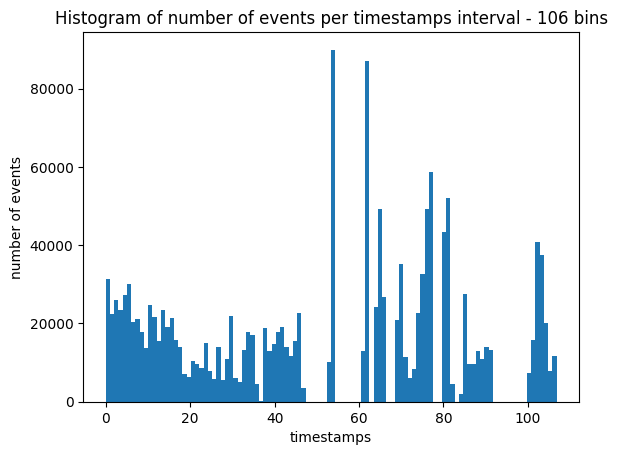

In [5]:
frame_bin=int(max_ts - min_ts)
plt.title('Histogram of number of events per timestamps interval - '+str(frame_bin)+' bins')
plt.xlabel('timestamps')
plt.ylabel('number of events')
plt.hist(ev[:, ordering.index('t')], bins=frame_bin)

In [6]:
nb_events_per_bin, edges = np.histogram(
    ev[:, ordering.index("t")],
    bins = range(int(min_ts), int(max_ts))
)

print('Number of bins:',len(nb_events_per_bin))
print('Empty bins in patchs of 1s:', list(nb_events_per_bin).count(0))
print('Max nb of events per bin:',max(nb_events_per_bin))

Number of bins: 105
Empty bins in patchs of 1s: 25
Max nb of events per bin: 91480


(array([25.,  1.,  0.,  0.,  1.,  2.,  2.,  6.,  3.,  4.,  3.,  4.,  2.,
         3.,  4.,  2.,  2.,  3.,  2.,  3.,  1.,  1.,  4.,  2.,  3.,  2.,
         0.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([    0. ,   914.8,  1829.6,  2744.4,  3659.2,  4574. ,  5488.8,
         6403.6,  7318.4,  8233.2,  9148. , 10062.8, 10977.6, 11892.4,
        12807.2, 13722. , 14636.8, 15551.6, 16466.4, 17381.2, 18296. ,
        19210.8, 20125.6, 21040.4, 21955.2, 22870. , 23784.8, 24699.6,
        25614.4, 26529.2, 27444. , 28358.8, 29273.6, 30188.4, 31103.2,
        32018. , 32932.8, 33847.6, 34762.4, 35677.2, 36592. , 37506.8,
        

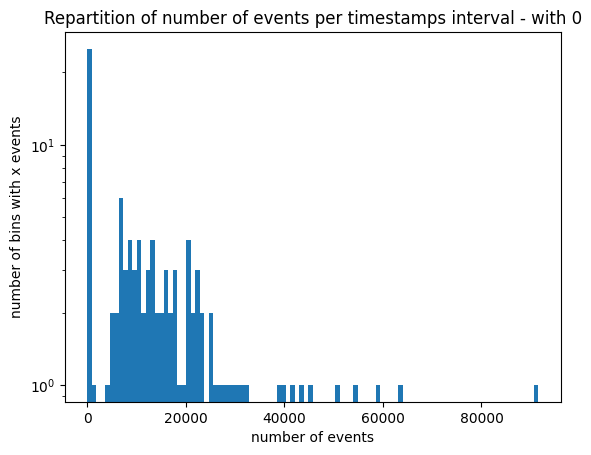

In [7]:
plt.title('Repartition of number of events per timestamps interval - with 0')
plt.yscale('log')
plt.xlabel('number of events')
plt.ylabel('number of bins with x events')
plt.hist(nb_events_per_bin, bins=100)

(array([1., 0., 0., 2., 1., 2., 6., 3., 4., 3., 4., 2., 3., 4., 2., 2., 3.,
        2., 2., 2., 1., 2., 4., 2., 2., 1., 1., 2., 1., 0., 2., 1., 0., 2.,
        1., 0., 0., 0., 0., 0., 0., 0., 2., 0., 1., 0., 1., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 1015.  ,  1919.65,  2824.3 ,  3728.95,  4633.6 ,  5538.25,
         6442.9 ,  7347.55,  8252.2 ,  9156.85, 10061.5 , 10966.15,
        11870.8 , 12775.45, 13680.1 , 14584.75, 15489.4 , 16394.05,
        17298.7 , 18203.35, 19108.  , 20012.65, 20917.3 , 21821.95,
        22726.6 , 23631.25, 24535.9 , 25440.55, 26345.2 , 27249.85,
        28154.5 , 29059.15, 29963.8 , 30868.45, 31773.1 , 32677.75,
        33582.4 , 34487.05, 35391.7 , 36296.35, 37201.  , 38105.65,
        39010.3 , 39914.95, 40819.6 , 41724.25, 42628.9 , 43533.55,
      

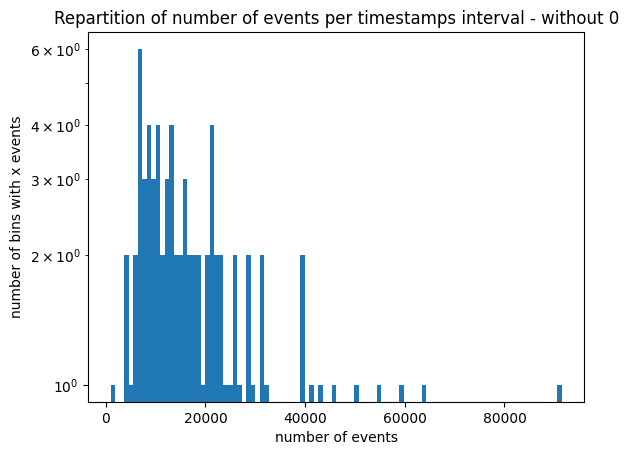

In [8]:
plt.title('Repartition of number of events per timestamps interval - without 0')
plt.yscale('log')
plt.xlabel('number of events')
plt.ylabel('number of bins with x events')
plt.hist(
    list(filter(lambda x: x != 0, nb_events_per_bin)),
    bins=100
)

# Visualise frame

In [9]:
# timewindow = bin_frame
W = np.max(ev[:,ordering.index('x')])
H = np.max(ev[:,ordering.index('y')])

positive_ev = ev[ ev[:,ordering.index('p')] > 0 ]
negative_ev = ev[ ev[:,ordering.index('p')] < 1 ]

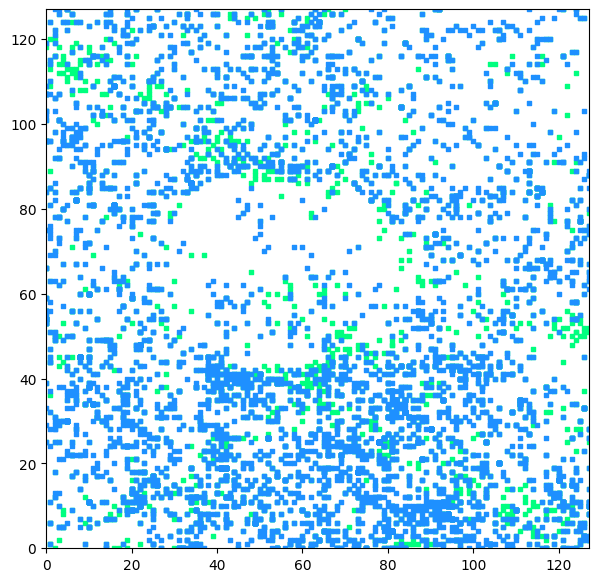

In [13]:
fig_events = plt.figure(figsize=(7,int(H*7/W)))
ax = plt.axes(xlim=(0, W), ylim=(0,H))
s = fig_events.get_size_inches()[0]  * fig_events.dpi / W

timewindow = 0.3
positive_ev_in_tw = positive_ev[positive_ev[:,ordering.index('t')] < timewindow]
negative_ev_in_tw = negative_ev[negative_ev[:,ordering.index('t')] < timewindow]
scatter_pos_events = plt.scatter(positive_ev_in_tw[:,ordering.index('x')], positive_ev_in_tw[:,ordering.index('y')], marker="s", color="springgreen", label="Positive events", s=s)
scatter_neg_events = plt.scatter(negative_ev_in_tw[:,ordering.index('x')], negative_ev_in_tw[:,ordering.index('y')], marker="s", color="dodgerblue", label="Negative events", s=s)
plt.show()

## Visualise animated events

In [ ]:
# Enable interactive plot
%matplotlib notebook

from matplotlib.animation import FuncAnimation

fig_events, ax = plt.subplots(figsize=(7,int(H*7/W)))
ax.set_xlim(0, W)
ax.set_ylim=(0,H)
s = fig_events.get_size_inches()[0]  * fig_events.dpi / W

scatter_pos_events = ax.scatter([],[], marker="s", animated=True, color="springgreen", label="Positive events", s=s)
scatter_neg_events = ax.scatter([],[], marker="s", animated=True, color="dodgerblue", label="Negative events", s=s)

positive_ev[:, ordering.index('t')] = (positive_ev[:, ordering.index('t')] - min_ts)
negative_ev[:, ordering.index('t')] = (negative_ev[:, ordering.index('t')] - min_ts)
print(max(negative_ev[:, ordering.index('t')]))

fps = 30
frame_interval = 1/24
timestamps = 0

def animate(i):
    global timestamps
    previous_timestamps = timestamps
    timestamps += frame_interval
    
    scatter_pos_events.set_offsets(positive_ev[(positive_ev[:,ordering.index('t')] >= previous_timestamps) & (positive_ev[:,ordering.index('t')] < timestamps)][: , ordering.index('x'):ordering.index('y')+1])
    scatter_neg_events.set_offsets(negative_ev[(negative_ev[:,ordering.index('t')] >= previous_timestamps) & (negative_ev[:,ordering.index('t')] < timestamps)][: , ordering.index('x'):ordering.index('y')+1])
    
    return scatter_pos_events, scatter_neg_events,

animation = FuncAnimation(fig_events, animate, blit=True, frames = int((max_ts - min_ts)/1e6 * fps), interval=1e3/fps, repeat=False)
plt.show()

## Visualise events with $y=0$ over time

Text(0, 0.5, 'x coordinates')

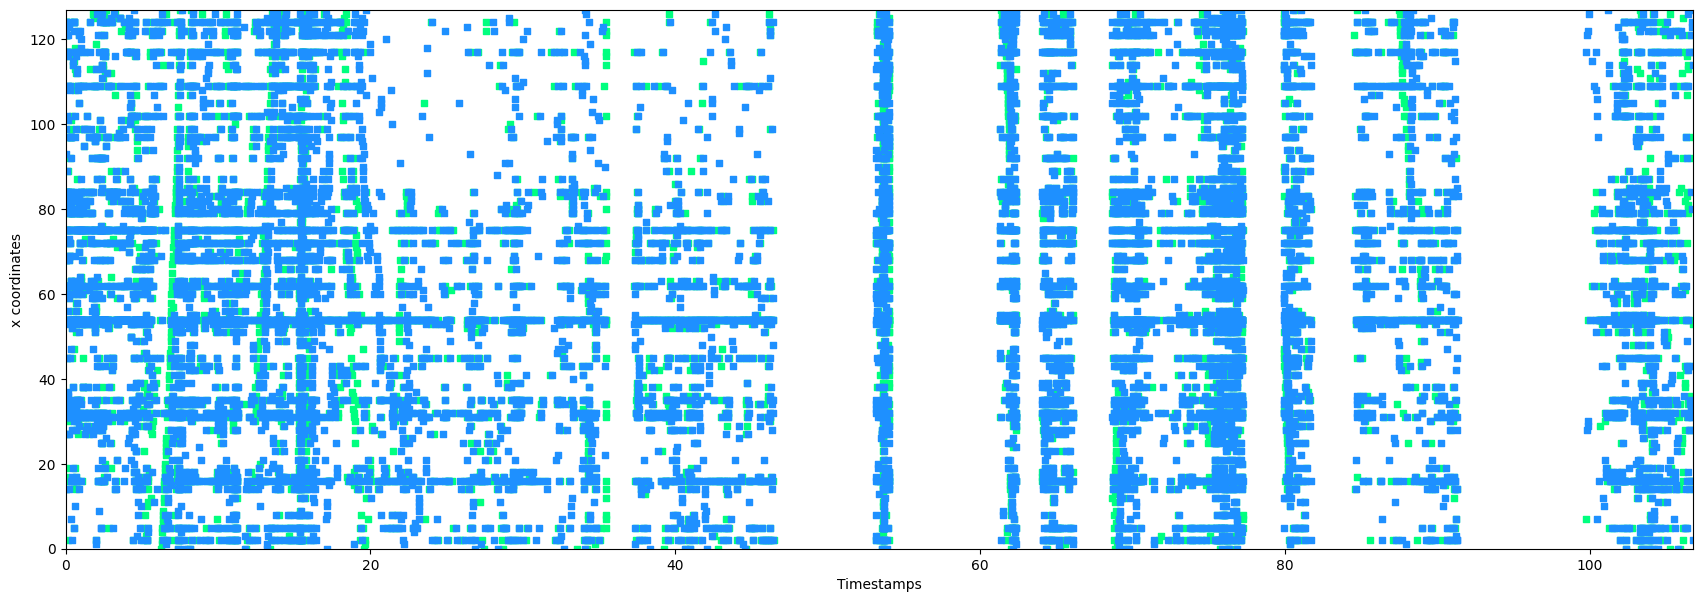

In [14]:
fig_events = plt.figure(figsize=(21, 7))
ax = plt.axes(xlim=(0, max_ts), ylim=(0,max(ev[:,ordering.index('x')])))
s = fig_events.get_size_inches()[0]  * fig_events.dpi / W

positive_ev = ev[ (ev[:,ordering.index('p')] > 0) & (ev[:,ordering.index('y')] == 0) ]
negative_ev = ev[ (ev[:,ordering.index('p')] < 1) & (ev[:,ordering.index('y')] == 0) ]

scatter_pos_events = plt.scatter(positive_ev[:,ordering.index('t')], positive_ev[:,ordering.index('x')], marker="s", color="springgreen", label="Positive events", s=s)
scatter_neg_events = plt.scatter(negative_ev[:,ordering.index('t')], negative_ev[:,ordering.index('x')], marker="s", color="dodgerblue", label="Negative events", s=s)

plt.xlabel('Timestamps')
plt.ylabel('x coordinates')

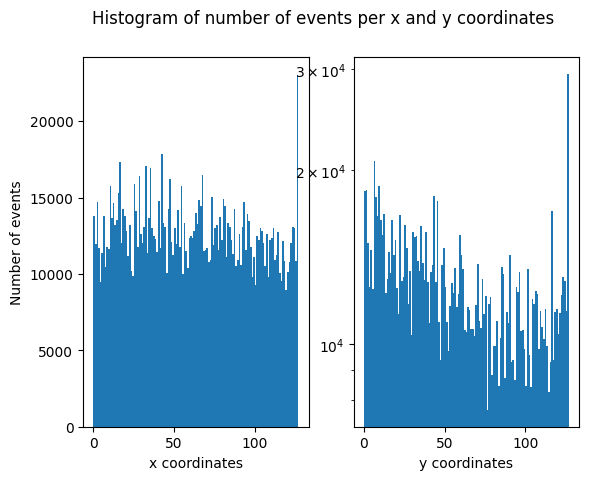

In [15]:
frame_bin=int(1e5)
f,axes = plt.subplots(1,2)
f.suptitle('Histogram of number of events per x and y coordinates')

axes[0].set_ylabel('Number of events')

axes[0].hist(ev[:, ordering.index('x')], bins=int(max(ev[:,ordering.index('x')])))
axes[0].set_xlabel('x coordinates')

axes[1].hist(ev[:, ordering.index('y')], bins=int(max(ev[:,ordering.index('y')])))
axes[1].set_xlabel('y coordinates')
axes[1].set_yscale('log')